In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

In [70]:
# inserting header in columns
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# data input
df = pd.read_csv('../data/housing.csv', delimiter=r'\s+', names=columns)

In [71]:
X = df['LSTAT']
y = df['MEDV']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [73]:
X_train

432    12.03
247    10.15
67      8.10
409    19.78
228     3.92
       ...  
177     6.29
360     7.79
335     8.01
154    15.12
71      9.88
Name: LSTAT, Length: 354, dtype: float64

In [74]:
def polynomial(x, a, b, c):
    return a*x**2 + b*x + c

def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

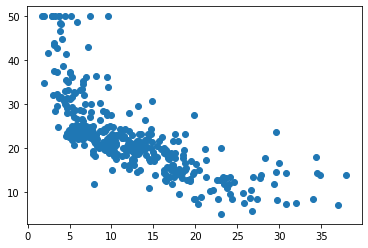

In [75]:
plt.scatter(X_train, y_train)
plt.show()

In [115]:
popt, pcov = curve_fit(exponential, X_train, y_train)

In [116]:
popt

array([40.94170274,  0.14342835, 12.51335804])

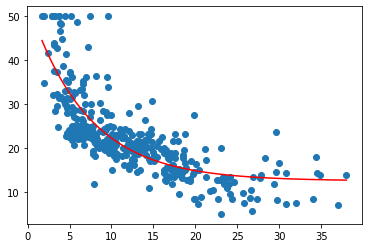

In [117]:
plt.scatter(X_train, y_train)
x_line = np.arange(1.73, 37.97, 0.01)
plt.plot(x_line, exponential(x_line, *popt), 'r-')
plt.show()